# Data Set and the Domain Problem 

This dataset was originally posted on Kaggle. 
Product backorder may be the result of strong sales performance (e.g. the product is in such a high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs).

This dataset has ~1.9 million observations of products/parts in an 8 week period. The source of the data is unreferenced.

* __Outcome__: whether the product went on backorder
* __Predictors__: Current inventory, sales history, forecasted sales, recommended stocking amount, product risk flags etc. (22 predictors in total)

The features and the target variable of the dataset are as follows:

**Description**
~~~
# Features: 
sku - Random ID for the product
national_inv - Current inventory level for the part
lead_time - Transit time for product (if available)
in_transit_qty - Amount of product in transit from source
forecast_3_month - Forecast sales for the next 3 months
forecast_6_month - Forecast sales for the next 6 months
forecast_9_month - Forecast sales for the next 9 months
sales_1_month - Sales quantity for the prior 1 month time period
sales_3_month - Sales quantity for the prior 3 month time period
sales_6_month - Sales quantity for the prior 6 month time period
sales_9_month - Sales quantity for the prior 9 month time period
min_bank - Minimum recommend amount to stock
potential_issue - Source issue for part identified
pieces_past_due - Parts overdue from source
perf_6_month_avg - Source performance for prior 6 month period
perf_12_month_avg - Source performance for prior 12 month period
local_bo_qty - Amount of stock orders overdue
deck_risk - Part risk flag
oe_constraint - Part risk flag
ppap_risk - Part risk flag
stop_auto_buy - Part risk flag
rev_stop - Part risk flag

# Target 
went_on_backorder - Product actually went on backorder
~~~

Two data files for training and testing are accessible in the JupyterHub environment.

---

# Part 1: Data Preprocessing



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import itertools
import numpy as np
import pandas as pd

## Load dataset

In [2]:
# location of the training set; for Parts 1 and 2, 
DATASET = '/dsa/data/all_datasets/back_order/Kaggle_Training_Dataset_v2.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET).sample(frac = 1).reset_index(drop=True)

dataset.head().transpose()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
sku,2083961,1790861,1314940,2945885,1879908
national_inv,4.0,32.0,6.0,2725.0,49.0
lead_time,8.0,2.0,9.0,NaN,8.0
in_transit_qty,0.0,15.0,0.0,0.0,0.0
forecast_3_month,3.0,160.0,0.0,0.0,0.0
forecast_6_month,3.0,292.0,0.0,0.0,0.0
forecast_9_month,6.0,430.0,0.0,0.0,0.0
sales_1_month,0.0,91.0,0.0,45.0,0.0
sales_3_month,3.0,206.0,0.0,70.0,1.0
sales_6_month,4.0,416.0,0.0,85.0,3.0


In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


---

## Processing


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

### Take samples and examine the dataset

In [5]:
dataset.iloc[:3,:6]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month
0,2083961,4.0,8.0,0.0,3.0,3.0
1,1790861,32.0,2.0,15.0,160.0,292.0
2,1314940,6.0,9.0,0.0,0.0,0.0


In [6]:
dataset.iloc[:3,6:12]

,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank
0,6.0,0.0,3.0,4.0,5.0,2.0
1,430.0,91.0,206.0,416.0,506.0,33.0
2,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dataset.iloc[:3,12:18]

,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk
0,No,0.0,0.86,0.89,0.0,No
1,No,0.0,0.86,0.88,0.0,No
2,No,0.0,0.69,0.68,0.0,Yes


In [8]:
dataset.iloc[:3,18:24]

,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,Yes,No,No
1,No,No,Yes,No,No
2,No,No,Yes,No,No


In [9]:
#Dimension
dataset.shape

(1687861, 23)

In [10]:
#No. of null values:
dataset.isnull().sum().sort_values(ascending = True)
#lead_time has the most in missing values, but it only missing 5.98% of its value. 
#So instead of droping it we can impute the values with the median.

sku                       0
stop_auto_buy             1
ppap_risk                 1
oe_constraint             1
deck_risk                 1
local_bo_qty              1
perf_12_month_avg         1
perf_6_month_avg          1
pieces_past_due           1
potential_issue           1
rev_stop                  1
min_bank                  1
sales_6_month             1
sales_3_month             1
sales_1_month             1
forecast_9_month          1
forecast_6_month          1
forecast_3_month          1
in_transit_qty            1
national_inv              1
sales_9_month             1
went_on_backorder         1
lead_time            100894
dtype: int64

In [11]:
#For lead_time, 100894 rows have missing values, which only accounts roughly 6%.
#As such, for simplicity sake, I shall drop those rows. 
dataset = dataset.dropna(subset=['lead_time'])

In [12]:
#Checking to see if anyother row has missing values:
dataset[dataset.isnull().any(axis=1)]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


In [13]:
#After dropping
dataset.isnull().sum().sort_values(ascending = True)

sku                  0
stop_auto_buy        0
ppap_risk            0
oe_constraint        0
deck_risk            0
local_bo_qty         0
perf_12_month_avg    0
perf_6_month_avg     0
pieces_past_due      0
potential_issue      0
rev_stop             0
min_bank             0
sales_6_month        0
sales_3_month        0
sales_1_month        0
forecast_9_month     0
forecast_6_month     0
forecast_3_month     0
in_transit_qty       0
lead_time            0
national_inv         0
sales_9_month        0
went_on_backorder    0
dtype: int64

In [14]:
#Checking for unique value count, to ensure no additional class for the object data types. 
dataset.nunique().sort_values().head(7)

went_on_backorder    2
stop_auto_buy        2
ppap_risk            2
oe_constraint        2
deck_risk            2
rev_stop             2
potential_issue      2
dtype: int64

In [15]:
#sku seems to be useless since its an ID, for that reason it shall be removed. 
dataset = dataset.drop('sku', axis=1)

### Finding unique values of string columns


In [16]:
# All the column names of these yes/no columns
yes_no_columns = list(filter(lambda i: dataset[i].dtype!=np.float64, dataset.columns))
print(yes_no_columns)

# Add code below this comment  (Question #E102)
# ----------------------------------
for name in yes_no_columns:
    ncount = dataset[name].nunique()
    print(f"No. of unique values in {name}= {ncount}\n")



['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
No. of unique values in potential_issue= 2

No. of unique values in deck_risk= 2

No. of unique values in oe_constraint= 2

No. of unique values in ppap_risk= 2

No. of unique values in stop_auto_buy= 2

No. of unique values in rev_stop= 2

No. of unique values in went_on_backorder= 2



In [17]:
for column_name in yes_no_columns:
    mode = dataset[column_name].apply(str).mode()[0]
    print('Filling missing values of {} with {}'.format(column_name, mode))
    dataset[column_name].fillna(mode, inplace=True)

Filling missing values of potential_issue with No
Filling missing values of deck_risk with No
Filling missing values of oe_constraint with No
Filling missing values of ppap_risk with No
Filling missing values of stop_auto_buy with Yes
Filling missing values of rev_stop with No
Filling missing values of went_on_backorder with No


### Convert yes/no columns into binary (0s and 1s)

In [18]:
# ----------------------------------

for column_name in yes_no_columns:
    dataset[column_name] = dataset[column_name].map({'Yes': 1, 'No': 0})
    


In [19]:
dataset[yes_no_columns].head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0


In [20]:
#checking again..
dataset[yes_no_columns].nunique().sort_values()

potential_issue      2
deck_risk            2
oe_constraint        2
ppap_risk            2
stop_auto_buy        2
rev_stop             2
went_on_backorder    2
dtype: int64

Now all columns should be either int64 or float64.

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586967 entries, 0 to 1687860
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1586967 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1586967 non-null  float64
 3   forecast_3_month   1586967 non-null  float64
 4   forecast_6_month   1586967 non-null  float64
 5   forecast_9_month   1586967 non-null  float64
 6   sales_1_month      1586967 non-null  float64
 7   sales_3_month      1586967 non-null  float64
 8   sales_6_month      1586967 non-null  float64
 9   sales_9_month      1586967 non-null  float64
 10  min_bank           1586967 non-null  float64
 11  potential_issue    1586967 non-null  int64  
 12  pieces_past_due    1586967 non-null  float64
 13  perf_6_month_avg   1586967 non-null  float64
 14  perf_12_month_avg  1586967 non-null  float64
 15  local_bo_qty       1586967 non-n

# Additional Analysis

In [22]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1586967.0,489.509814,30461.681455,-27256.0,4.00,14.00,78.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1586967.0,45.474925,1309.357238,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1586967.0,188.743874,5182.992191,0.0,0.00,0.00,5.00,1427612.0
forecast_6_month,1586967.0,365.339017,10099.621249,0.0,0.00,0.00,15.00,2461360.0
forecast_9_month,1586967.0,536.280119,14825.764059,0.0,0.00,0.00,25.00,3777304.0
sales_1_month,1586967.0,56.911400,1854.774698,0.0,0.00,0.00,5.00,741774.0
sales_3_month,1586967.0,178.483536,4971.128633,0.0,0.00,1.00,16.00,1105478.0
sales_6_month,1586967.0,352.231864,9679.297427,0.0,0.00,3.00,33.00,2146625.0
sales_9_month,1586967.0,544.127176,15148.714501,0.0,0.00,4.00,50.00,3205172.0


In [23]:
dataset[(dataset['perf_6_month_avg'] == -99)]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
90,0.0,2.0,0.0,32.0,32.0,32.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.00,0.0,0,0,1,1,0,0
142,97915.0,8.0,0.0,0.0,0.0,0.0,20.0,56.0,126.0,196.0,...,0.0,-99.0,-99.00,0.0,0,0,1,1,0,0
182,2.0,8.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.00,0.0,0,0,1,1,0,0
408,0.0,8.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.00,0.0,0,0,1,1,0,0
454,5.0,12.0,0.0,8.0,8.0,8.0,4.0,6.0,13.0,17.0,...,2.0,-99.0,-99.00,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687365,98.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.00,0.0,0,0,0,1,0,0
1687587,238.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,1.00,0.0,0,0,0,1,0,0
1687753,53.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0,...,0.0,-99.0,-99.00,0.0,1,0,0,1,0,0
1687775,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,0.50,0.0,1,0,0,1,0,0


National_inv and perf_6_month_avg are the only two factors with negative values..

In [24]:
dataset[dataset['national_inv'] < 0]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
191,-6.0,5.0,0.0,87.0,153.0,226.0,7.0,26.0,43.0,48.0,...,0.0,0.65,0.69,6.0,1,0,0,1,0,1
614,-6.0,12.0,0.0,360.0,360.0,360.0,21.0,63.0,136.0,234.0,...,0.0,0.00,0.00,26.0,0,0,0,1,0,1
1235,-2.0,8.0,12.0,36.0,72.0,108.0,14.0,42.0,76.0,112.0,...,0.0,0.99,0.98,2.0,0,0,0,1,0,0
1338,-49.0,8.0,0.0,480.0,480.0,480.0,50.0,145.0,160.0,173.0,...,0.0,0.41,0.47,50.0,0,0,0,1,0,0
1395,-3.0,8.0,1.0,8.0,12.0,14.0,10.0,14.0,16.0,18.0,...,0.0,0.88,0.91,3.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686813,-1.0,12.0,1.0,178.0,279.0,382.0,30.0,106.0,195.0,316.0,...,0.0,0.90,0.87,6.0,0,0,0,1,0,0
1686865,-18.0,8.0,0.0,50.0,72.0,91.0,4.0,13.0,34.0,63.0,...,0.0,0.43,0.46,18.0,0,0,0,1,0,0
1687070,-9.0,2.0,0.0,17.0,22.0,27.0,29.0,48.0,58.0,94.0,...,0.0,0.94,0.97,9.0,0,0,0,1,0,0
1687380,-1.0,2.0,17.0,14.0,14.0,26.0,8.0,143.0,170.0,175.0,...,14.0,1.00,1.00,1.0,0,0,1,1,0,0


28585 rows have a performance score of -99, which falls outside the expected range of 0 to 1. It could be that it's likely either a placeholder or invalid data. 

Since it only accounts for roughly 2% of the data, it's best to remove it to avoid any sort of distortion or masking of true trends in the data.

-------------------------------------------------------------------------------------------------------------------------------

For 'national_inv', the negative value might indicate shortage or some other significant condition related to inventory level, so it could play a role in predicting backorders. Therefore, no transformation will be done on it.  

In [25]:
dataset = dataset[dataset['perf_6_month_avg'] != -99]

In [26]:
dataset.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,...,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06,1.558382e+06
mean,3.802791e+02,7.776911e+00,4.530699e+01,1.902717e+02,3.683614e+02,5.405133e+02,5.654217e+01,1.771638e+02,3.495892e+02,5.397040e+02,...,2.161210e+00,7.823812e-01,7.786977e-01,6.354430e-01,2.014975e-01,1.572143e-04,1.171382e-01,9.772739e-01,2.367840e-04,6.970691e-03
std,1.180172e+04,6.737802e+00,1.317042e+03,5.228494e+03,1.018746e+04,1.495164e+04,1.865093e+03,4.984666e+03,9.676399e+03,1.511379e+04,...,2.446111e+02,2.370141e-01,2.280164e-01,3.356762e+01,4.011188e-01,1.253753e-02,3.215849e-01,1.490291e-01,1.538597e-02,8.319919e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,7.000000e-01,7.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,...,0.000000e+00,8.500000e-01,8.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,7.600000e+01,9.000000e+00,0.000000e+00,6.000000e+00,1.600000e+01,2.600000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.100000e+01,...,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,6.363276e+06,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [27]:
#Checking shape:
dataset.shape

(1558382, 22)

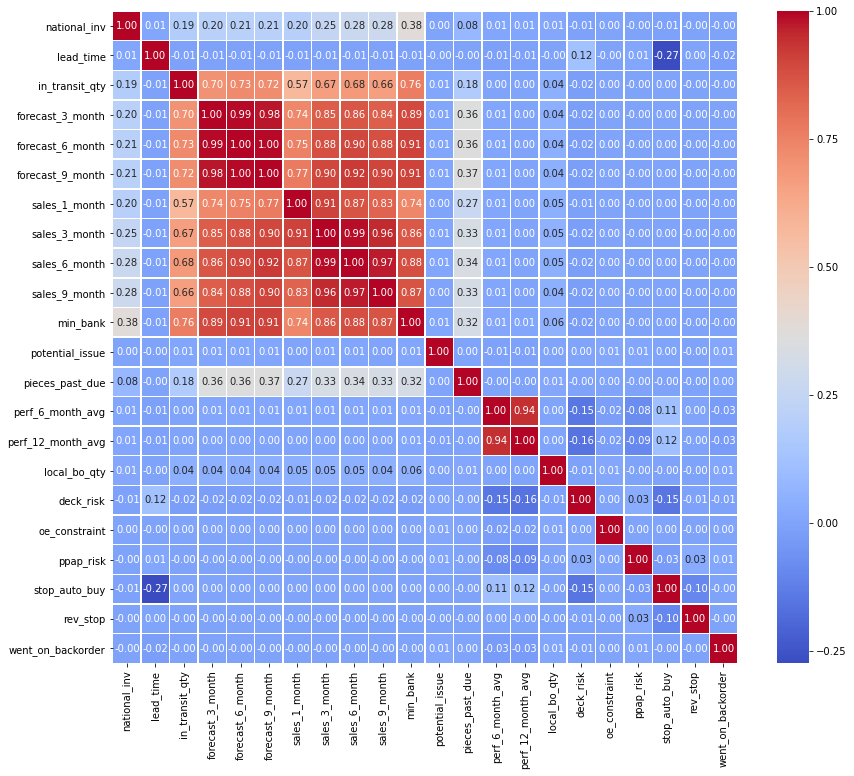

In [28]:
#Now we can check for correlations:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataset.corr()  # Assuming your dataset is named `dataset`
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

From the looks of it:

1)forecast_3_month, forecast_6_month, and forecast_9_month are highly positively correlated with each other.


2)Similarly, sales_1_month, sales_3_month, sales_6_month, and sales_9_month also show strong inter-correlations.


3)perf_6_month_avg and perf_12_month_avg are almost perfectly correlated

-------------------------------------------------------------------------------------------------------------------------------

To avoid multicollinearity, I will keep only one feature from each correlated group. 
Interestingly, there doesn't seem to be much of a strong correlation with the target (went_on_backorder). They might show some interesting patterns with the combinations of other factors.

Since the 6 month period has records for forecast, sales, and performance, I will retain data for that time period while discarding the rest.  

In [29]:
#Droping columns to prevent multicollinearity:
remove = ['forecast_3_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_9_month', 'perf_12_month_avg']
dataset = dataset.drop(remove, axis=1)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558382 entries, 0 to 1687860
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1558382 non-null  float64
 1   lead_time          1558382 non-null  float64
 2   in_transit_qty     1558382 non-null  float64
 3   forecast_6_month   1558382 non-null  float64
 4   sales_6_month      1558382 non-null  float64
 5   min_bank           1558382 non-null  float64
 6   potential_issue    1558382 non-null  int64  
 7   pieces_past_due    1558382 non-null  float64
 8   perf_6_month_avg   1558382 non-null  float64
 9   local_bo_qty       1558382 non-null  float64
 10  deck_risk          1558382 non-null  int64  
 11  oe_constraint      1558382 non-null  int64  
 12  ppap_risk          1558382 non-null  int64  
 13  stop_auto_buy      1558382 non-null  int64  
 14  rev_stop           1558382 non-null  int64  
 15  went_on_backorder  1558382 non-n

<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

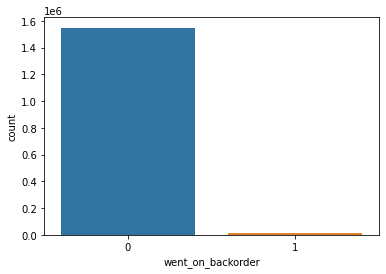

In [31]:
#Checking the distribution of 1 and 0 in target variable
sns.countplot(x='went_on_backorder', data=dataset)
#Unbalanced dataset

In [32]:
dataset['went_on_backorder'].value_counts()

0    1547519
1      10863
Name: went_on_backorder, dtype: int64

Since the dataset contains over ~1.5 million records and is highly imbalanced, the best approach is to balance the dataset and use a small sample for visualizations.

-------------------------------------------------------------------------------------------------------------------------------

The same sample will be used for part - 2 as well. 

### Smartly sampling the data into a more manageable size for cross-validation 

In [33]:
num_backorder = np.sum(dataset['went_on_backorder']==1)
print('backorder ratio:', num_backorder, '/', len(dataset), '=', num_backorder / len(dataset))

backorder ratio: 10863 / 1558382 = 0.00697069139658954


In [34]:
# ----------------------------------
from sklearn.utils import resample
yes = dataset[dataset['went_on_backorder'] == 1]
no = dataset[dataset['went_on_backorder'] == 0]

no_downsample = resample(no, 
                        replace = False,
                        n_samples = yes.shape[0],
                        random_state = 13)

newdf = pd.concat([yes, no_downsample]) 

newdf = newdf.sample(frac=1, random_state=42).reset_index(drop=True)

#X =  newdf.drop(columns='went_on_backorder')
#y = newdf.went_on_backorder
newdf.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,7.0,8.0,0.0,0.0,2.0,0.0,0,0.0,0.78,0.0,0,0,0,1,0,0
1,1.0,8.0,0.0,27.0,56.0,0.0,0,0.0,0.70,0.0,0,0,0,1,0,1
2,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,0.42,0.0,1,0,1,1,0,0
3,68.0,8.0,0.0,0.0,1.0,0.0,0,0.0,0.99,0.0,0,0,0,1,0,0
4,0.0,8.0,0.0,10.0,7.0,0.0,0,0.0,0.80,0.0,1,0,0,1,0,1


In [42]:
newdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,21726.0,173.851975,2210.815929,-2999.0,1.00,5.00,24.00,198243.0
lead_time,21726.0,7.034061,5.536575,0.0,2.00,8.00,8.00,52.0
in_transit_qty,21726.0,23.933490,403.452298,0.0,0.00,0.00,0.00,29937.0
forecast_6_month,21726.0,299.561907,3678.859259,0.0,0.00,7.00,46.00,267300.0
sales_6_month,21726.0,250.292184,3786.395388,0.0,0.00,8.00,39.75,373777.0
min_bank,21726.0,37.592148,407.341005,0.0,0.00,0.00,4.00,29376.0
potential_issue,21726.0,0.002670,0.051600,0.0,0.00,0.00,0.00,1.0
pieces_past_due,21726.0,2.642502,61.314695,0.0,0.00,0.00,0.00,7812.0
perf_6_month_avg,21726.0,0.743241,0.270452,0.0,0.65,0.82,0.96,1.0
local_bo_qty,21726.0,2.632560,48.524005,0.0,0.00,0.00,0.00,2999.0


In [36]:
newdf.shape

(21726, 16)

The sample size is not bad, but to ensure the pipelines are slightly faster and no memory issues pop up, I will reduce it to a size of 10000 instances.

In [37]:
yes_small = newdf[newdf['went_on_backorder'] == 1].sample(n=5000, random_state=42)
no_small = newdf[newdf['went_on_backorder'] == 0].sample(n=5000, random_state=42)

sample = pd.concat([yes_small, no_small]).sample(frac=1, random_state=42).reset_index(drop=True)
sample.head()

,national_inv,lead_time,in_transit_qty,forecast_6_month,sales_6_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,34.0,9.0,0.0,32.0,40.0,0.0,0,0.0,0.86,0.0,0,0,0,1,0,0
1,6.0,8.0,0.0,211.0,173.0,22.0,0,0.0,0.79,0.0,0,0,0,1,0,1
2,30.0,8.0,14.0,84.0,107.0,24.0,0,0.0,0.98,0.0,0,0,0,1,0,1
3,1.0,9.0,0.0,23.0,15.0,0.0,0,0.0,0.86,0.0,0,0,0,1,0,1
4,-3.0,8.0,0.0,13.0,17.0,1.0,0,0.0,0.86,3.0,0,0,0,1,0,1


In [38]:
sample.shape

(10000, 16)

In [39]:
# ----------------------------------
sample.to_csv('newdf.csv', index=False)

# A few visuals:

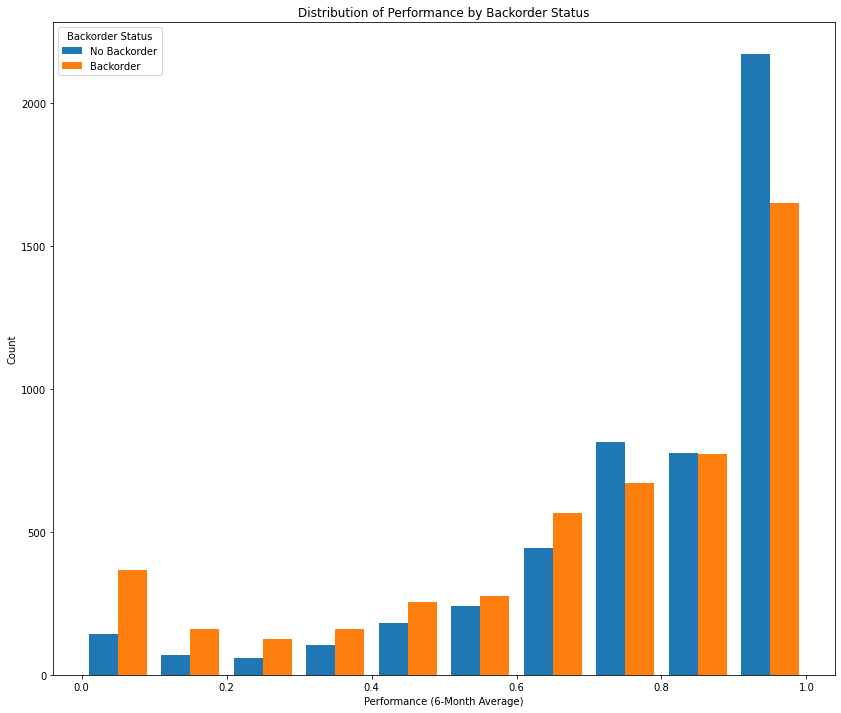

In [40]:
#Distribution of Performance by Backorder Status
plt.figure(figsize=(14, 12))
plt.hist(
    [sample[sample['went_on_backorder'] == 0]['perf_6_month_avg'],  
     sample[sample['went_on_backorder'] == 1]['perf_6_month_avg']],  
    bins=10, 
    label=['No Backorder', 'Backorder']
)

plt.title('Distribution of Performance by Backorder Status')
plt.xlabel('Performance (6-Month Average)')
plt.ylabel('Count')
plt.legend(title='Backorder Status')

plt.show()

Ok, from the plot we can kind of understand that suppliers with lower performance scores are more frequently associated with backorders. 

However, the total number of backorders is higher among suppliers with higher scores, likely because those suppliers are used more frequently overall.

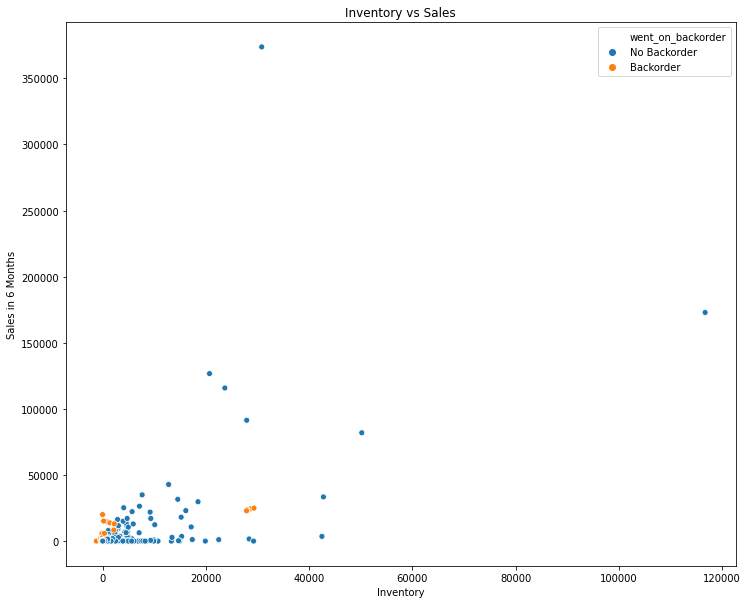

In [41]:
#Inventory vs Sales
plt.figure(figsize=(12, 10))
sns.scatterplot(x='national_inv', y='sales_6_month', 
                hue=sample['went_on_backorder'].map({0: 'No Backorder', 1: 'Backorder'}), 
                data=sample)
plt.title('Inventory vs Sales')
plt.xlabel('Inventory')
plt.ylabel('Sales in 6 Months')
plt.show()

It seems that products with low prior sales can go on backorder if their inventory is very low, which can be seen from the cluster of orange dots. It could suggest that some items are not stocked adequately, even for small demand. There is a possibility of other features or combination of features that may play a role here. 